In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/credit-risk-assessment-system/application_train.csv')
bureau=pd.read_csv('/kaggle/input/credit-risk-assessment-system/bureau.csv')

In [3]:
df.shape

(307511, 122)

In [4]:
pd.set_option('display.max_columns', 133)
print('Top 5 Columns of Training Dataset:')
df.head()

Top 5 Columns of Training Dataset:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
print(df.dtypes.value_counts())

float64    65
int64      41
object     16
Name: count, dtype: int64


In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
nv = df.isnull().sum().sort_values(ascending=False)
print(nv)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64


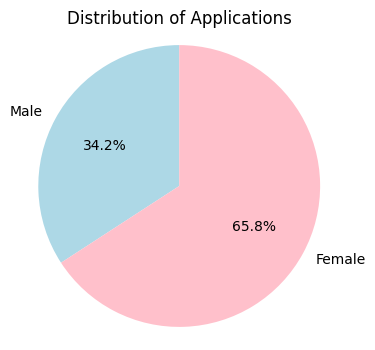

In [8]:
male  = df[df['CODE_GENDER']=='M']
female = df[df['CODE_GENDER']=='F']

labels = ['Male', 'Female']
sizes = [len(male), len(female)]

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue','pink'])
plt.title('Distribution of Applications')
plt.axis('equal')  
plt.show()

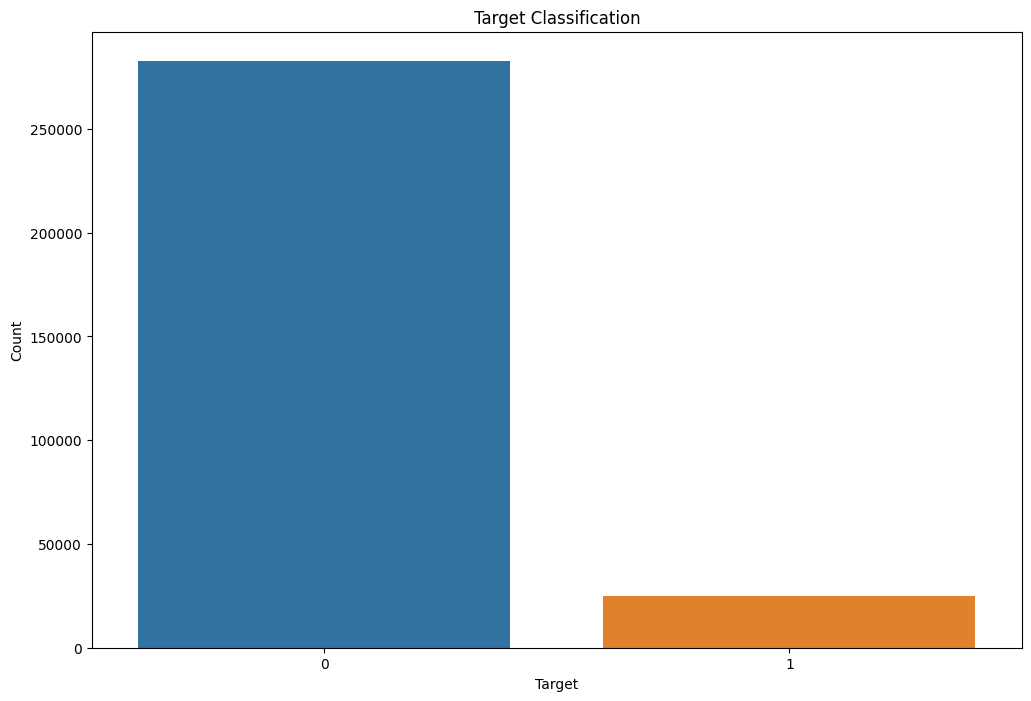

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x="TARGET", data=df)
plt.title('Target Classification')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

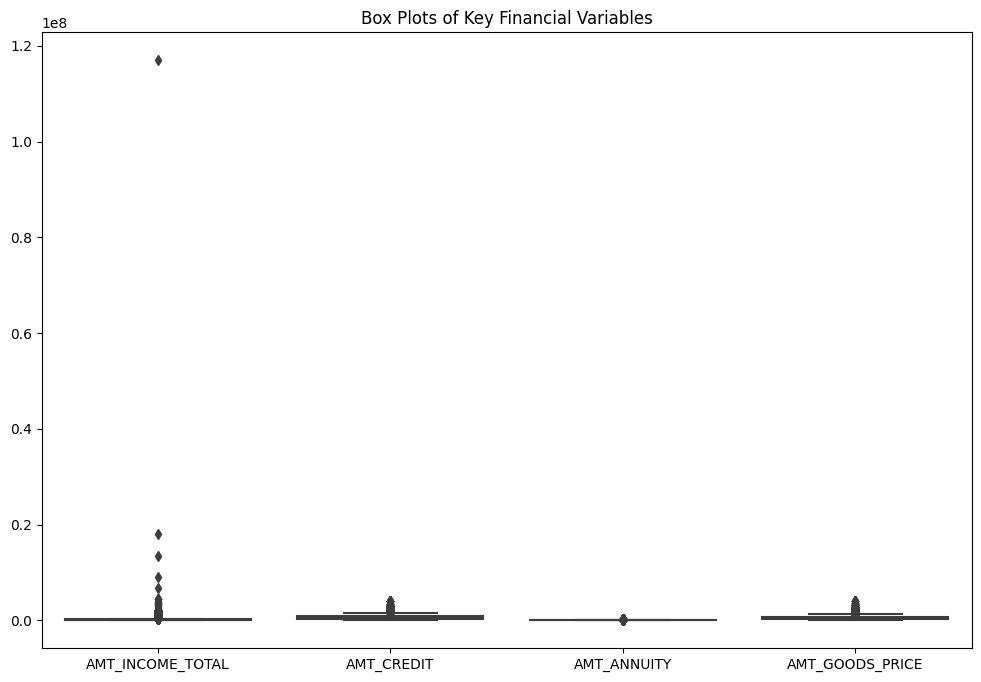

In [10]:
cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[cols], orient="v") 
plt.title("Box Plots of Key Financial Variables")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


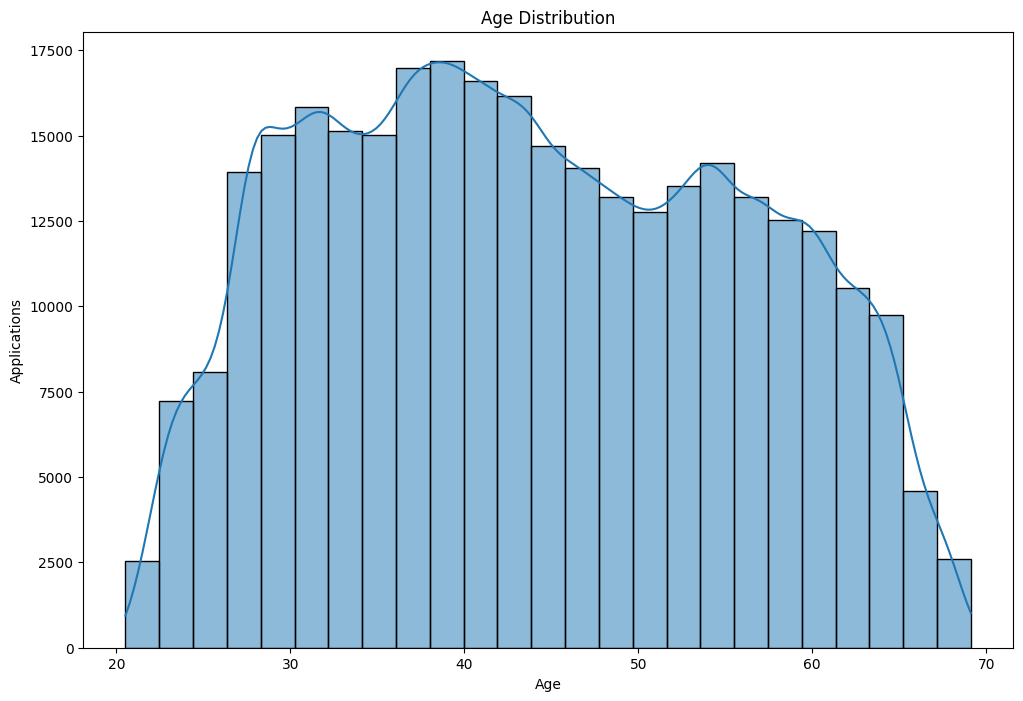

In [11]:
#applications across different age groups

plt.figure(figsize=(12,8))
sns.histplot(df['DAYS_BIRTH']/-365, bins=25, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Applications')
plt.show()

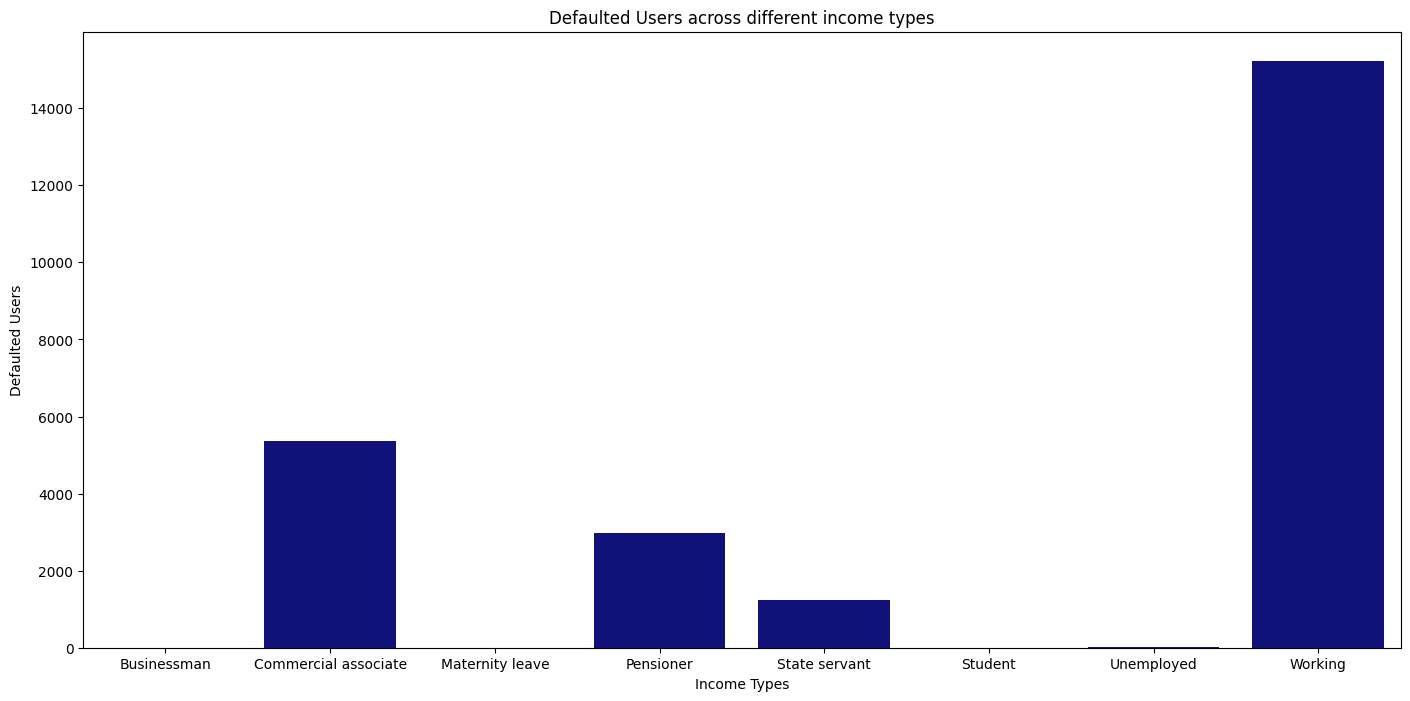

In [ ]:
#target insights across different occupation types

inc = df.groupby('NAME_INCOME_TYPE')['TARGET'].sum().reset_index()

plt.figure(figsize=(17,8))
sns.barplot(data=inc, x='NAME_INCOME_TYPE', y='TARGET', color='darkblue')
plt.title('Defaulted Users across different income types')
plt.xlabel('Income Types')
plt.ylabel('Defaulted Users')
plt.xticks(ticks=range(len(inc)), labels=inc['NAME_INCOME_TYPE'].astype(str))
plt.show()

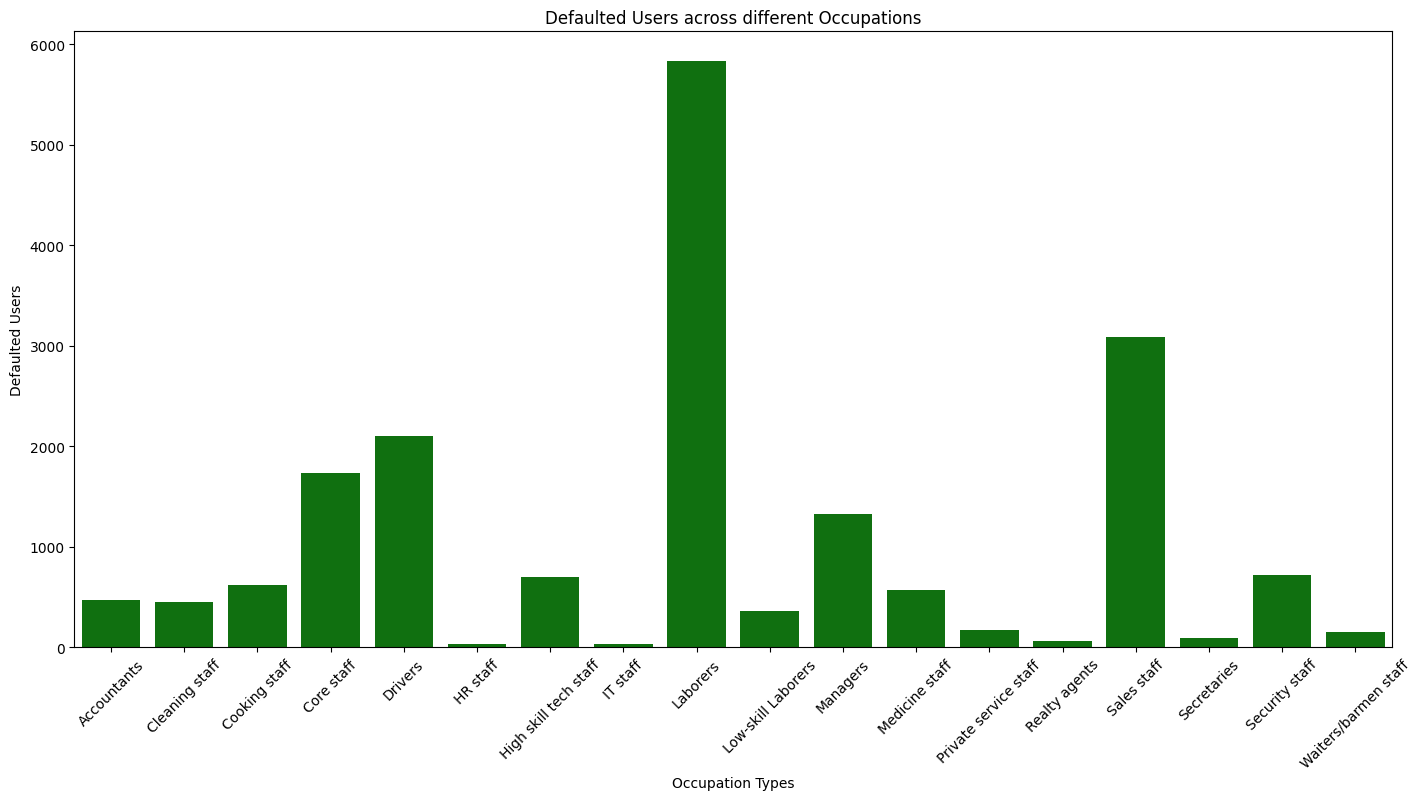

In [13]:
#target insights across different occupations

occ1 = df.groupby('OCCUPATION_TYPE')['TARGET'].sum().reset_index()
occ=occ1[occ1['OCCUPATION_TYPE']!=0]

plt.figure(figsize=(17,8))
sns.barplot(data=occ, x='OCCUPATION_TYPE', y='TARGET', color='green')
plt.title('Defaulted Users across different Occupations')
plt.xlabel('Occupation Types')
plt.ylabel('Defaulted Users')
plt.xticks(ticks=range(len(occ)), labels=occ['OCCUPATION_TYPE'].astype(str), rotation=45)
plt.show()

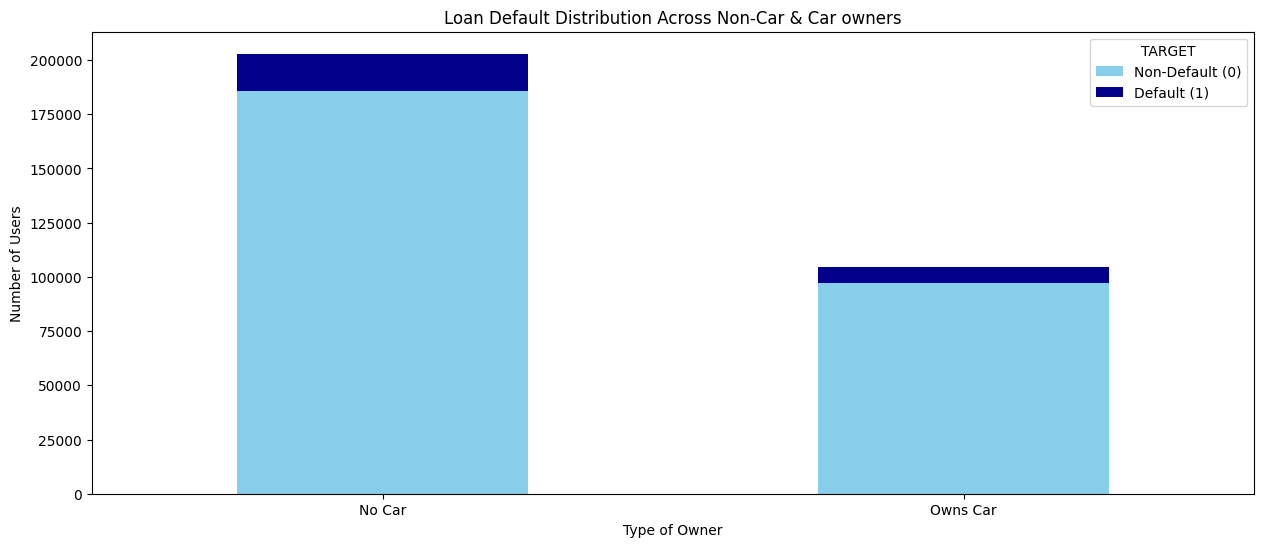

In [14]:
# Count of 0's and 1's across luxury comodity owners

vehicle = df.groupby(['FLAG_OWN_CAR', 'TARGET']).size().reset_index(name='count')
vehicle['FLAG_OWN_CAR'] = vehicle['FLAG_OWN_CAR'].replace({'Y': 'Owns Car', 'N': 'No Car'})
vcl_pivot = vehicle.pivot(index='FLAG_OWN_CAR', columns='TARGET', values='count')

vcl_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(15,6),
    color={0: 'skyblue', 1: 'darkblue'}
)

plt.title('Loan Default Distribution Across Non-Car & Car owners')
plt.xlabel('Type of Owner')
plt.ylabel('Number of Users')
plt.legend(title='TARGET', labels=['Non-Default (0)', 'Default (1)'])
plt.xticks(rotation=0)
plt.show()

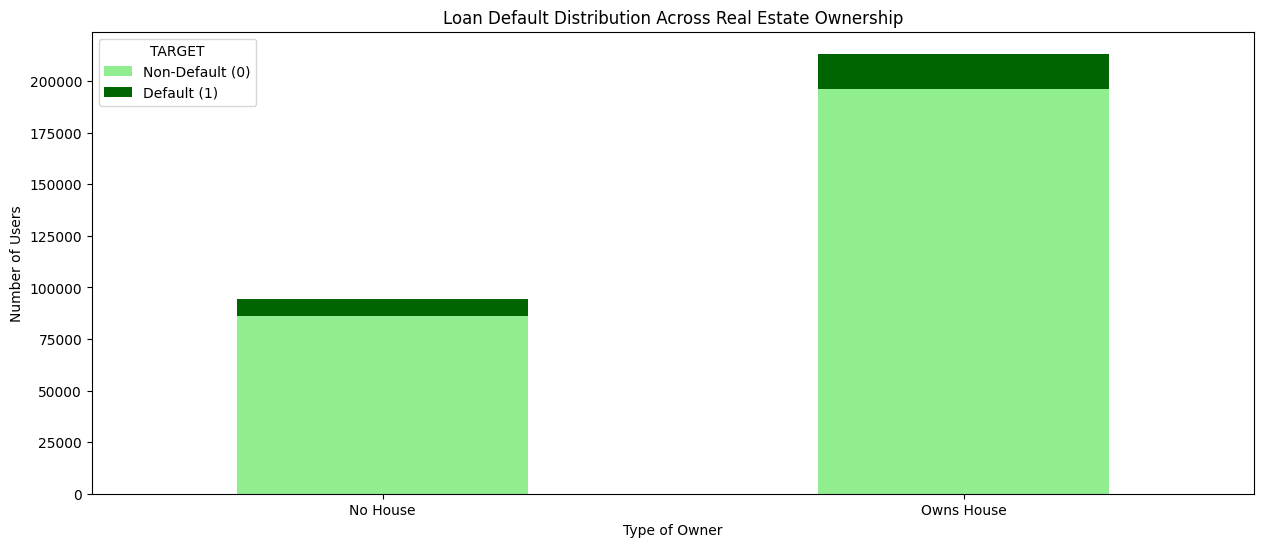

In [15]:
# Count of 0's and 1's across house owners

home = df.groupby(['FLAG_OWN_REALTY', 'TARGET']).size().reset_index(name='count')
home['FLAG_OWN_REALTY'] = home['FLAG_OWN_REALTY'].replace({'Y': 'Owns House', 'N': 'No House'})
hm_pivot = home.pivot(index='FLAG_OWN_REALTY', columns='TARGET', values='count')

hm_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(15,6),
    color={0: 'lightgreen', 1: 'darkgreen'}
)

plt.title('Loan Default Distribution Across Real Estate Ownership')
plt.xlabel('Type of Owner')
plt.ylabel('Number of Users')
plt.legend(title='TARGET', labels=['Non-Default (0)', 'Default (1)'])
plt.xticks(rotation=0)
plt.show()

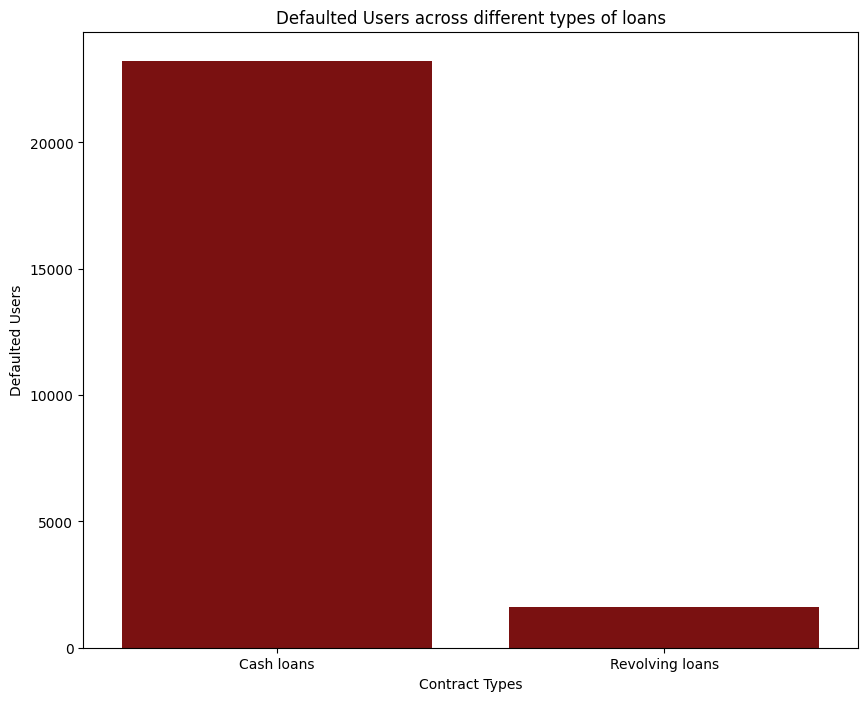

In [16]:
#target insights across different occupations

occ = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].sum().reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=occ, x='NAME_CONTRACT_TYPE', y='TARGET', color='darkred')
plt.title('Defaulted Users across different types of loans')
plt.xlabel('Contract Types')
plt.ylabel('Defaulted Users')
plt.xticks(ticks=range(len(occ)), labels=occ['NAME_CONTRACT_TYPE'].astype(str))
plt.show()

# **FEATURE ENGINEERING** 

In [17]:
#---------------------------------------------- BUREAU DATASET ----------------------------------------------------
bureau_copy = bureau.copy()
bureau_copy['CREDIT_DURATION'] = bureau_copy['DAYS_CREDIT_ENDDATE'] - bureau_copy['DAYS_CREDIT']
bureau_copy['ENDDATE_DIFF'] = bureau_copy['DAYS_ENDDATE_FACT'] - bureau_copy['DAYS_CREDIT_ENDDATE']
bureau_copy['IS_ACTIVE'] = bureau_copy['CREDIT_ACTIVE'].apply(lambda x: 1 if x=='Active' else 0)
bureau_copy['IS_CLOSED'] = bureau_copy['CREDIT_ACTIVE'].apply(lambda x: 1 if x=='Closed' else 0)
bureau_copy['HAS_OVERDUE'] = bureau_copy['AMT_CREDIT_SUM_OVERDUE'].apply(lambda x: 1 if x>0 else 0)

bureau_agg = bureau_copy.groupby('SK_ID_CURR').agg(
    total_credits = ('SK_ID_BUREAU', 'count'),
    active_credits = ('IS_ACTIVE', 'sum'),
    closed_credits = ('IS_CLOSED', 'sum'),
    overdue_credits = ('HAS_OVERDUE', 'sum'),
    total_overdue = ('AMT_CREDIT_SUM_OVERDUE', 'sum'),
    total_debt = ('AMT_CREDIT_SUM_DEBT', 'sum'),
    total_credit = ('AMT_CREDIT_SUM', 'sum'),
    mean_credit_duration = ('CREDIT_DURATION', 'mean'),
    enddate_diff_sum = ('ENDDATE_DIFF', 'sum'),
)

df = df.merge(bureau_agg, on='SK_ID_CURR', how='left')
df.fillna(0, inplace=True)

In [18]:
df["active/total"]  = df["active_credits"]  / df["total_credits"]
df["closed/total"]  = df["closed_credits"]  / df["total_credits"]
df["overdue/total"] = df["overdue_credits"] / df["total_credits"]
df['loan_dur'] = df["AMT_CREDIT"] / (df["AMT_ANNUITY"]+1)
df['prop_credit'] = df["AMT_CREDIT"] / df["AMT_INCOME_TOTAL"]
df['prop_goods_pr'] = df["AMT_GOODS_PRICE"] / df["AMT_INCOME_TOTAL"]
df['prop_annuity'] = df["AMT_ANNUITY"] / df["AMT_INCOME_TOTAL"]

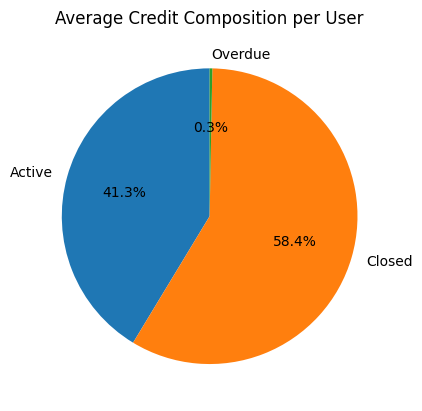

In [19]:
avg_props = {
    "Active":  df["active/total"].mean(),
    "Closed":  df["closed/total"].mean(),
    "Overdue": df["overdue/total"].mean()
}

plt.pie(avg_props.values(), labels=avg_props.keys(), autopct="%.1f%%", startangle=90)
plt.title("Average Credit Composition per User")
plt.show()

In [20]:
for col in ['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE','DAYS_EMPLOYED','CODE_GENDER']:  
    print(col, df[col].unique())

AMT_INCOME_TOTAL [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_INCOME_TOTAL [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_GOODS_PRICE [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 0
 'Other_B' 'Group of people']
DAYS_EMPLOYED [  -637  -1188   -225 ... -12971 -11084  -8694]
CODE_GENDER ['M' 'F' 'XNA']


In [21]:
def clean_data(df):
    placeholders = ["XNA", "XAP", "Unknown", "NA", "N/A", "0"]
    df = df.replace(placeholders, np.nan)
    df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace([0, 'Other_A', 'Other_B'], np.nan)
    # df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].replace(0, np.nan)
    # df['AMT_CREDIT'] = df['AMT_CREDIT'].replace(0, np.nan)
    # df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].replace(0, np.nan)
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].mean())
    return df

df=clean_data(df)
df.isnull().sum().sort_values(ascending=False).head(10)

ORGANIZATION_TYPE      55374
overdue/total          44020
active/total           44020
closed/total           44020
NAME_TYPE_SUITE         3928
CODE_GENDER                4
NAME_FAMILY_STATUS         2
FLAG_DOCUMENT_5            0
WALLSMATERIAL_MODE         0
EMERGENCYSTATE_MODE        0
dtype: int64

In [22]:
df['Age']=(df['DAYS_BIRTH']/-365).round().astype(int)
df['Employement_dur']=(df['DAYS_EMPLOYED']/-365).round().astype('Int64')

In [23]:
drop_cols = [
    'OWN_CAR_AGE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
    'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE',
    'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE',
    'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',
    'ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI',
    'LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI',
    'FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
    'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
    'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
    'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','DAYS_BIRTH','DAYS_EMPLOYED','SK_ID_CURR','DAYS_REGISTRATION','DAYS_ID_PUBLISH'
]

df = df.drop(columns=drop_cols)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


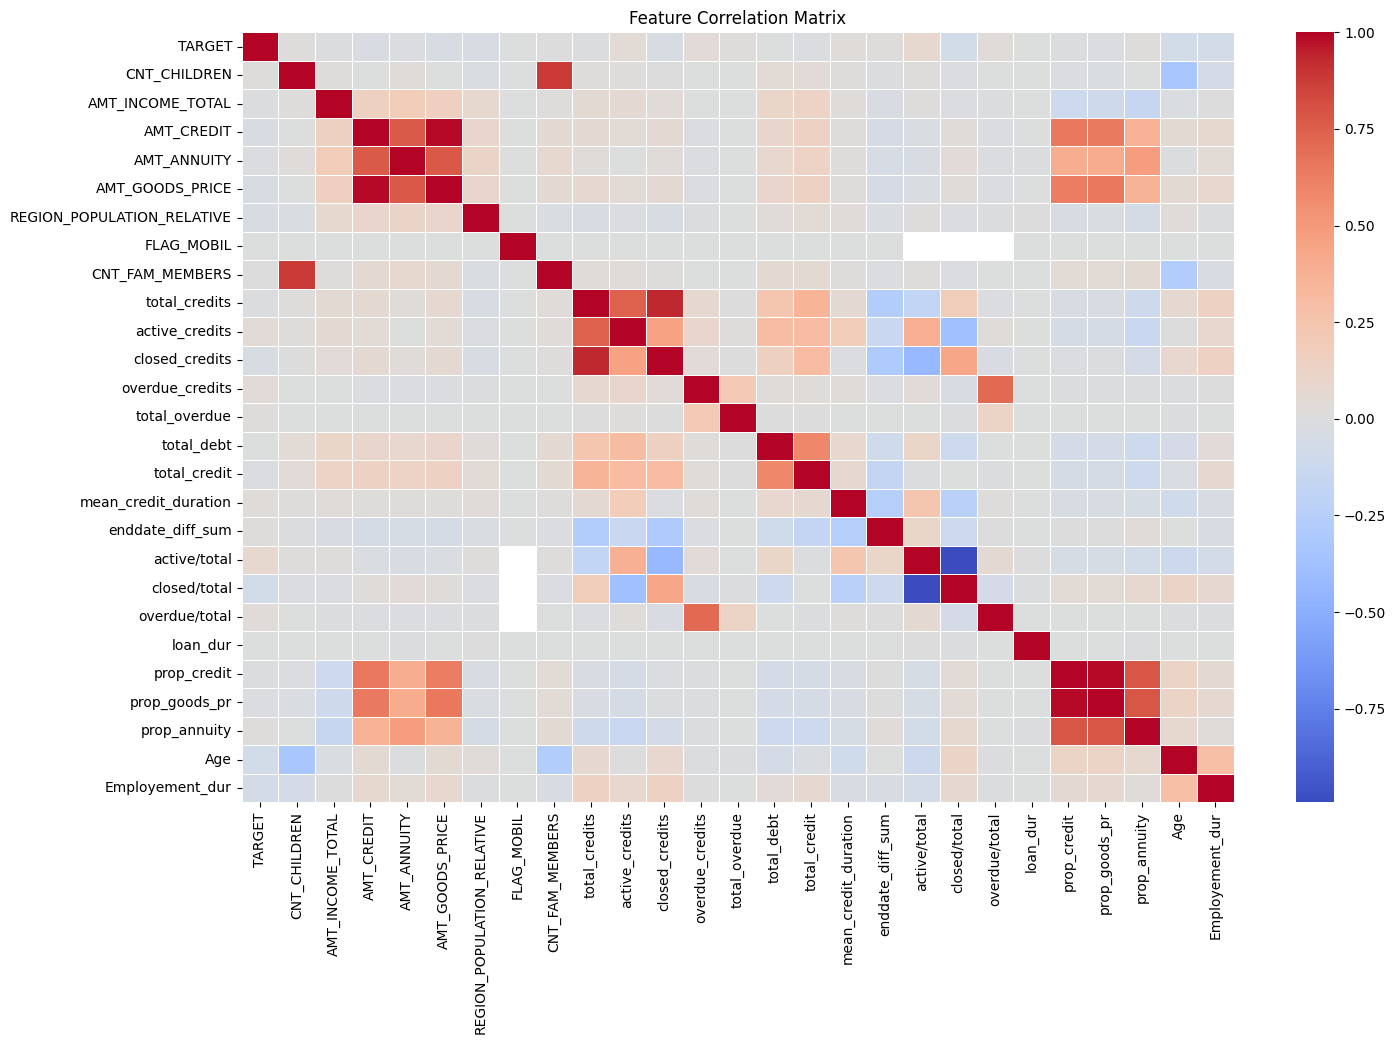

In [24]:
# correlation between numerical features

df_num = df.select_dtypes(include=['int64', 'float64']) 
corr_matrix = df_num.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [25]:
X=df.drop(columns='TARGET')
y=df['TARGET']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import category_encoders as ce

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

target_enc_cols = ['CNT_CHILDREN','CNT_FAM_MEMBERS','Employement_dur','Age','total_credits','active_credits','closed_credits','overdue_credits']
for col in target_enc_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

encoder_te = ce.TargetEncoder(cols=target_enc_cols, smoothing=10, handle_unknown='value', handle_missing='value')
X_train = encoder_te.fit_transform(X_train, y_train)
X_test = encoder_te.transform(X_test)

numeric_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','total_overdue','total_debt','total_credit','mean_credit_duration','enddate_diff_sum',
               'active/total','closed/total','overdue/total','prop_credit','prop_annuity','prop_goods_pr']
categorical_cols = ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_HOUSING_TYPE','FLAG_MOBIL',
                    'OCCUPATION_TYPE','NAME_TYPE_SUITE','CODE_GENDER']

for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

colums = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols),
    ('new_col', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),['NAME_EDUCATION_TYPE'])
])

X_train = colums.fit_transform(X_train)
X_test = colums.transform(X_test)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.9195323805342829
ROC AUC: 0.6584024468327159


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.919386046209128
ROC AUC: 0.6330281303428721


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.9194023055785897
ROC AUC: 0.6792467934397773
